In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Text(0.5,1,'By class')

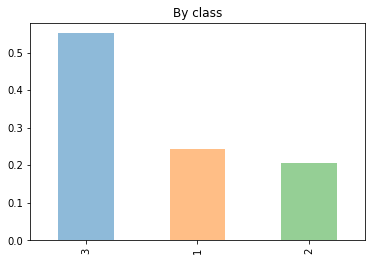

In [7]:
df.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('By class')

Text(0.5,1,'Survived / Age')

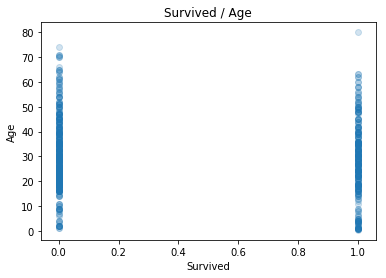

In [8]:
plt.scatter(df.Survived, df.Age, alpha=0.2)
plt.ylabel('Age')
plt.xlabel('Survived')
plt.title('Survived / Age')

In [9]:
male_survived = df[df['Sex']=='male']
female_survived = df[df['Sex']=='female']

## KDE plot for Pclass and Age

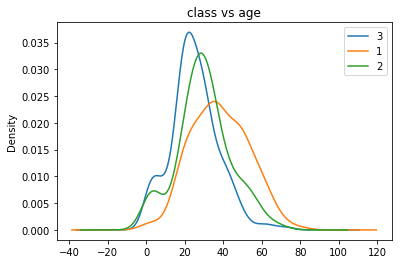

In [10]:
legend=[]
for x in df.Pclass.unique():
    legend.append(x)
    df.Age[df.Pclass==x].plot(kind="kde")
plt.title('class vs age')
plt.legend(legend)
plt.show()

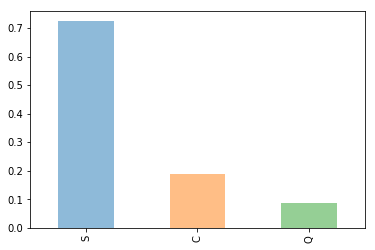

In [11]:
df.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()

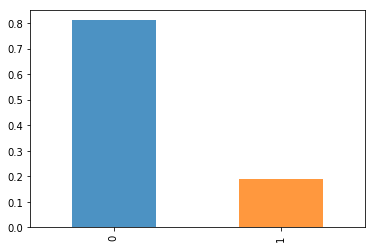

In [12]:
df.Survived[df.Sex=='male'].value_counts(normalize=True).plot(kind='bar', alpha=0.8)

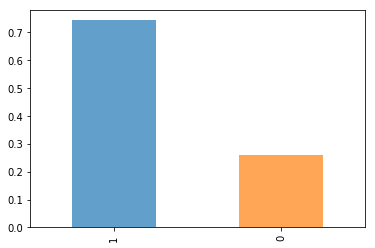

In [13]:
df.Survived[df.Sex=='female'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)

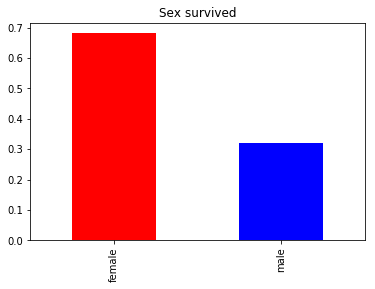

In [14]:
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar', color=['r', 'b'])
plt.title('Sex survived')
plt.show()

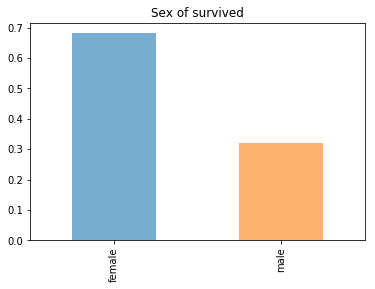

In [15]:
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar', alpha=0.6)
plt.title('Sex of survived')
plt.show()

## Rich men survived

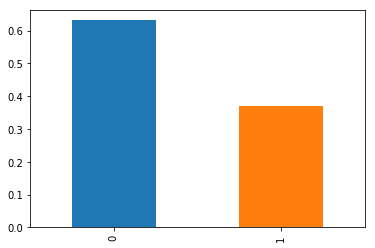

In [16]:
df.Survived[(df.Sex=='male') & (df.Pclass==1)].value_counts(normalize=True).plot(kind='bar')

## Poor men survived

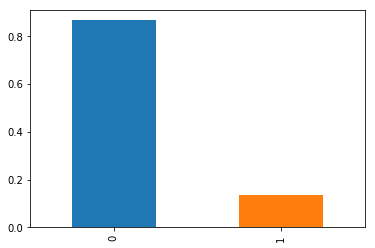

In [17]:
df.Survived[(df.Sex=='male') & (df.Pclass==3)].value_counts(normalize=True).plot(kind='bar')

## Rich women survived

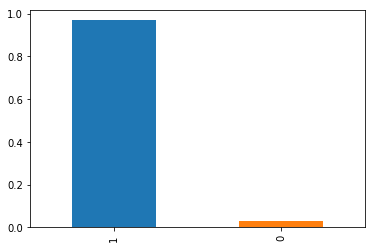

In [18]:
df.Survived[(df.Sex=='female') & (df.Pclass==1)].value_counts(normalize=True).plot(kind='bar')

## Poor women survived ~

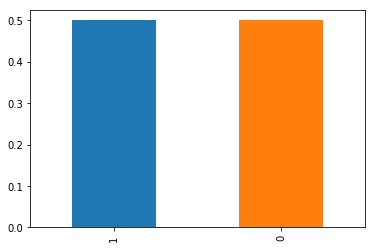

In [19]:
df.Survived[(df.Sex=='female') & (df.Pclass==3)].value_counts(normalize=True).plot(kind='bar')

In [20]:
df['Hyp']=0
df.loc[df.Sex=='female', "Hyp"]=1

In [21]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [22]:
df['Result']=0
df.loc[df.Survived==df['Hyp'], "Result"]=1

In [23]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp,Result
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1


In [24]:
df['Result'].value_counts(normalize=True)

1    0.786756
0    0.213244
Name: Result, dtype: float64

In [25]:
def clean_data(data):
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] = data['Age'].fillna(data['Age'].dropna().median())
    
    data.loc[data['Sex']=='male', 'Sex']=0
    data.loc[data['Sex']=='female', 'Sex']=1
    
    data['Embarked'] = data['Embarked'].fillna("S")
    data.loc[data['Embarked']=='S', 'Embarked']=0
    data.loc[data['Embarked']=='C', 'Embarked']=1
    data.loc[data['Embarked']=='Q', 'Embarked']=2

In [26]:
clean_data(df)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hyp,Result
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1


In [28]:
df.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [29]:
from sklearn import linear_model

In [30]:
y=df.Survived.values

In [31]:
X=df[['Pclass','Age',"Fare","Embarked",'Sex','SibSp','Parch']].values

In [32]:
classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(X, y)

In [33]:
classifier_.score(X, y)

0.7991021324354658

In [34]:
from sklearn import preprocessing

In [35]:
poly = preprocessing.PolynomialFeatures(degree=2)

In [36]:
poly_features = poly.fit_transform(X)

In [37]:
classifier_ = classifier.fit(poly_features, y)
classifier_.score(poly_features, y)

0.8294051627384961

In [38]:
from sklearn import tree

In [39]:
feature_names = ['Pclass', 'Age', 'Fare', 'Embarked', 'Sex', 'SibSp', 'Parch']

In [40]:
features = df[feature_names].values

In [41]:
decision_tree = tree.DecisionTreeClassifier(random_state=1)

In [42]:
decision_tree_ = decision_tree.fit(features, y)

In [62]:
decision_tree_.score(features, y)

0.9135802469135802

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
train_X, test_X, train_y, test_y = train_test_split(features, y, test_size=0.33, random_state=36)

In [65]:
decision_tree_ = decision_tree.fit(train_X, train_y)

In [66]:
pred_y=decision_tree.predict(test_X)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(test_y, pred_y)

0.7694915254237288

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
decision_tree = tree.DecisionTreeClassifier(random_state=1)
decision_tree_ = decision_tree.fit(features, y)
decision_tree_.score(features, y)

0.9797979797979798

In [ ]:
cross_val_score(decision_tree, X, y, scoring='accuracy', cv=50)